In [1]:
import os

In [2]:
p = os.path.join('..', 'clips', '3mm')

In [3]:
p

'../clips/3mm'

In [4]:
movie_dir = os.path.join('..', 'clips', '3mm')
subs = sorted(os.listdir(movie_dir))

In [6]:
subs[0:3]

['atlas_masked.npy', 'sub-01', 'sub-02']

In [ ]:
fastsrm.assert_array_2axis?

In [ ]:
fastsrm.check_imgs?

In [ ]:
from nilearn import image

In [ ]:
from os import chdir
chdir('../sub_data')

In [ ]:
im1 = image.load_img('wrdcsub-01_ses-06_task-ClipsTrn01_acq-pa_bold.nii.gz')
im2 = image.load_img('wrdcsub-01_ses-06_task-ClipsVal01_acq-pa_bold.nii.gz')
im3 = image.load_img('wrdcsub-01_ses-23_task-lec1_acq-pa_bold.nii.gz')
im4 = image.load_img('wrdcsub-01_ses-23_task-lec1_acq-ap_bold.nii.gz')
im5 = image.load_img('wrdcsub-02_ses-07_task-ClipsTrn01_acq-pa_bold.nii.gz')

In [ ]:
im1.shape

In [ ]:
im5.shape

In [ ]:
im2.shape

In [ ]:
im3.shape

In [ ]:
im4.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np

In [ ]:
fastsrm.FastSRM?

In [ ]:
# Get atlases
from nilearn import datasets

In [ ]:
# Basc atlas
# This atlas includes group brain parcellations generated from resting-state  
# fMRI from about 200 young healthy subjects.
# Multiple scales (number of networks) are available: 7, 12, 20, 36, 64, 122, 197, 325, 444
parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')

In [ ]:
parcellations

In [ ]:
networks_444 = parcellations['scale444']

In [ ]:
# MSDL (multi-subject dictionary learning) atlas
# It is a segmentation of spontaneous brain activity (DMN)
atlas_data = datasets.fetch_atlas_msdl()
atlas_filename = atlas_data.maps

In [ ]:
atlas_data

In [ ]:
# Schaefer atlas
# Atlas created using resting state fMRI data from 1489 subjects in MNI space
schaefer = datasets.fetch_atlas_schaefer_2018(n_rois=800)

In [2]:
fastsrm.reduce_data?

In [3]:
from nilearn import image

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
from os import chdir

In [5]:
chdir('/volatile/sshankar/fastsrm_data/Raiders/sub-01/ses-01/')

In [6]:
ap_post = image.load_img('wrdcsub-01_ses-16_task-Raiders_acq-ap_run-04_bold.nii.gz')
pa_post = image.load_img('wrdcsub-01_ses-16_task-Raiders_acq-pa_run-01_bold.nii.gz')

In [8]:
ap_pre = image.load_img('../sub-01_ses-16_task-Raiders_acq-ap_run-04_bold.nii.gz')
pa_pre = image.load_img('../sub-01_ses-16_task-Raiders_acq-pa_run-01_bold.nii.gz')

In [9]:
from nilearn import plotting

ap post_processing


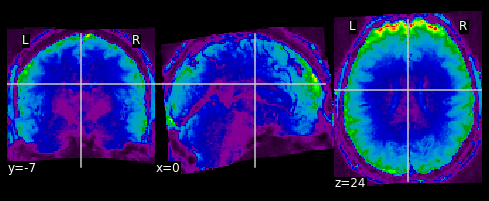

In [13]:
print("ap post_processing")
plotting.plot_epi(ap_post.slicer[...,50])

ap pre-processing


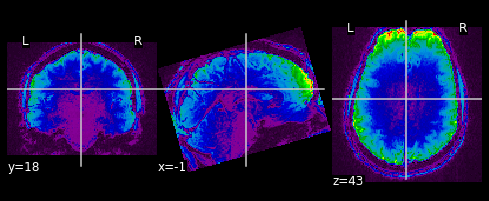

In [14]:
print("ap pre-processing")
plotting.plot_epi(ap_pre.slicer[...,50])

pa post_processing


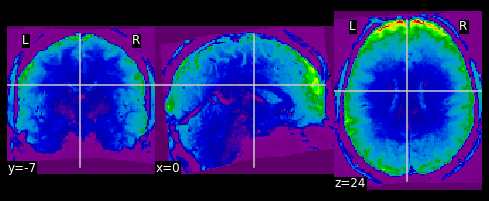

In [15]:
print("pa post_processing")
plotting.plot_epi(pa_post.slicer[...,50])

pa pre-processing


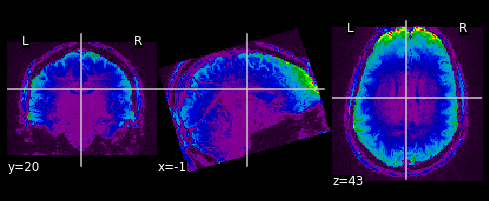

In [16]:
print("pa pre-processing")
plotting.plot_epi(pa_pre.slicer[...,50])

In [17]:
from matplotlib.pyplot import plot

In [18]:
%matplotlib inline

In [19]:
ap_post.shape

(105, 127, 105, 379)

In [30]:
ap_post_data = ap_post.get_fdata()

In [31]:
ap_post_data[50,50,50,50]

3825.0

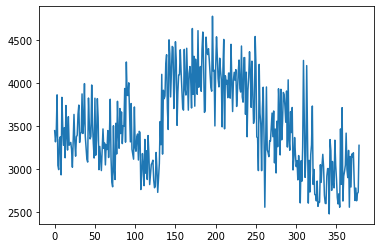

In [32]:
plot(ap_post_data[50,50,50,:])

In [ ]:
atlas = image.load_img('/volatile/sshankar/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/')

In [33]:
from nilearn.input_data import NiftiMasker

In [34]:
from nilearn.datasets import load_mni152_brain_mask

In [35]:
mask_img = load_mni152_brain_mask()

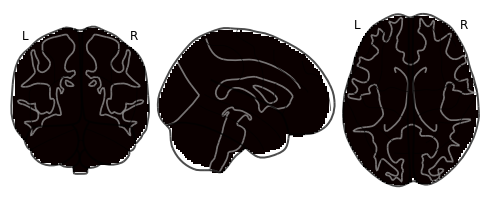

In [36]:
plotting.plot_glass_brain(mask_img)

In [38]:
masker = NiftiMasker(mask_img=mask_img, standardize=True)

In [39]:
dat = masker.fit_transform(ap_post)

In [40]:
dat.shape

(379, 228453)

In [41]:
ap_post.shape

(105, 127, 105, 379)

In [42]:
105*127*105

1400175

In [43]:
from nilearn.input_data import MultiNiftiMasker
multimasker = MultiNiftiMasker(mask_img=mask_img, standardize=True)

In [44]:
from pathlib import Path

In [46]:
import os

In [47]:
files = os.listdir('/volatile/sshankar/fastsrm_data/Raiders/sub-01/ses-01/')

In [48]:
files

['wrdcsub-01_ses-16_task-Raiders_acq-pa_run-03_bold.nii.gz',
 'wrdcsub-01_ses-16_task-Raiders_acq-ap_run-04_bold.nii.gz',
 'wrdcsub-01_ses-16_task-Raiders_acq-ap_run-06_bold.nii.gz',
 'wrdcsub-01_ses-16_task-Raiders_acq-pa_run-02_bold.nii.gz',
 'wrdcsub-01_ses-16_task-Raiders_acq-ap_run-05_bold.nii.gz',
 'wrdcsub-01_ses-16_task-Raiders_acq-pa_run-01_bold.nii.gz']

In [49]:
multidat = multimasker.fit_transform(files)

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/volatile/sshankar/fastsrm_env/lib/python3.6/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. Th

In [58]:
multidat[1].shape

(379, 228453)

In [2]:
import numpy as np

In [4]:
npy_dat = np.load('/home/sshankar/raiders/3mm/sub-01/ses-01/masked_imgs_preproc.npy', allow_pickle=True)

In [5]:
npy_dat.shape

(6,)

In [6]:
npy_dat[0].shape

(379, 46448)

In [8]:
type(npy_dat[0])

numpy.ndarray

In [9]:
npy_dat_test = np.load('/home/sshankar/raiders/3mm/sub-01/ses-01/masked_imgs_preproc_test.npy', allow_pickle=True)

In [10]:
npy_dat_test.shape

(6,)

In [11]:
npy_dat_test[0].shape

(379, 46448)

In [25]:
np.max(npy_dat[0]-npy_dat_test[0])

1.9073486e-06

In [16]:
import matplotlib.pyplot as plt

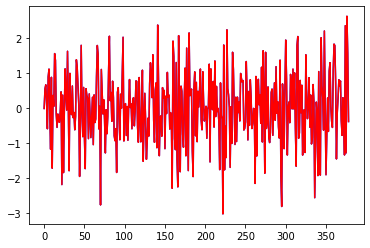

In [22]:
i = 28759
plt.plot(npy_dat[0][:,i], 'b')
plt.plot(npy_dat_test[0][:,i], 'r')

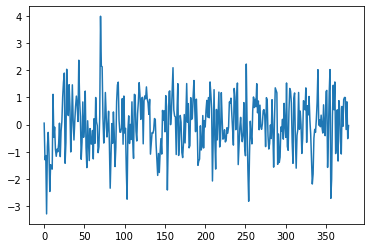

In [20]:
plt.plot(npy_dat_test[0][:,439])

In [27]:
npy_dat_test = np.load('/home/sshankar/raiders/3mm/sub-01/ses-02/masked_imgs_preproc_test.npy', allow_pickle=True)

In [28]:
npy_dat = np.load('/home/sshankar/raiders/3mm/sub-01/ses-02/masked_imgs_preproc.npy', allow_pickle=True)

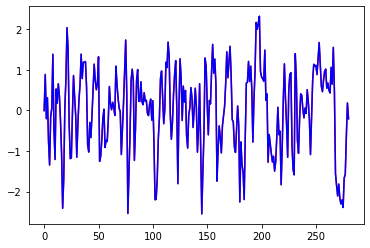

In [43]:
i = 0
plt.plot(npy_dat_test[0][:,i], 'r')
plt.plot(npy_dat[0][:,i], 'b')


In [30]:
np.max(npy_dat[0]-npy_dat_test[0])

1.4305115e-06